## Lab 5 - Categorization

This lab must be done **individually**. The required packages have been imported for you below.

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import spatial  
from sklearn.model_selection import LeaveOneOut

Data adapted from Leuven Concept Database (De Deyne et al., 2008).

Extract data from file.

In [60]:
df = pd.read_csv('data-categorization.csv')

Get feature list.

In [61]:
features = list(df.features)
features.remove('category')

Get names of all animals.

In [62]:
names = list(df); del names[0]

Get binary feature matrix (animal-by-feature).

In [63]:
F = pd.read_csv("data-categorization.csv", header=0, usecols=list(np.arange(1,54)))
F = np.asarray(F)

Get category labels.

In [64]:
labels = F[len(F)-1,:]

Config `F` such that each row is feature vector of one animal.

Each column is either a bird (category label = 0) or a fish (category label = 1).

In [65]:
F = np.delete(F,len(F)-1,0) 
F = np.transpose(F)

You should have the following variables:

(**Hint**: Print them out to see what they are).

1. Main variables you'll need for analysis:
    - `F`:        53-by-44 binary matrix, i.e. 53 animal exemplars (30 birds and 23 fish) and 44 features
    - `labels`:   53 binary category labels (0 for bird; 1 for fish), i.e. ground truth that you'll predict
    
    
2. Auxillary variables
    - `names`:    53 animal names
    - `features`: 44 feature names
    
In this lab, you will implement, evaluate, and analyze two models of categorization, based on the prototype and exemplar theories. You will test these models against a dataset of birds and fish, features and category labels of which have been provided in the matrix and array processed for you (see above). 

You will first be guided through a non-assessed visualization, via multi-dimensional scaling (MDS)---this will offer you an intuition of the data you work with in a 2D space. You will then implement each of the two models, evaluate them in leave-one-out-cross-validation (as discussed in class), and interpret the errors made by each model.

In [66]:
print(F)
print(labels)
print(names)
print(features)

[[0 0 1 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 1 1 ... 0 1 0]
 ...
 [0 1 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
['eagle', 'dove', 'duck', 'magpie', 'pheasant', 'vulture', 'rooster', 'turkey', 'canary', 'chicken', 'cuckoo', 'crow', 'chickadee', 'seagull', 'blackbird', 'sparrow', 'stork', 'parrot', 'parakeet', 'peacock', 'pelican', 'penguin', 'heron', 'robin', 'woodpecker', 'ostrich', 'owl', 'falcon', 'swan', 'swallow', 'anchovy', 'dolphin', 'trout', 'goldfish', 'shark', 'herring', 'squid', 'cod', 'carp', 'orca', 'eel', 'piranha', 'plaice', 'flatfish', 'sperm whale', 'ray', 'sardine', 'pike', 'stickleback', 'sole', 'whale', 'salmon', 'swordfish']
['is bluish grey', 'has a big bill', 'is brown', 'makes a sound', 'is ugly', 'is a pet', 'is edible', 'can swim', 'has large eyes', 'is big', 'is black and white', 'is not eaten', 'is beautiful', 'is found in a pond', 'does not li

### Data visualization (not assessed)

Run the code below to visualize the animals in two dimensions, via multi-dimensional scaling.

Text(0, 0.5, 'Dimension 2')

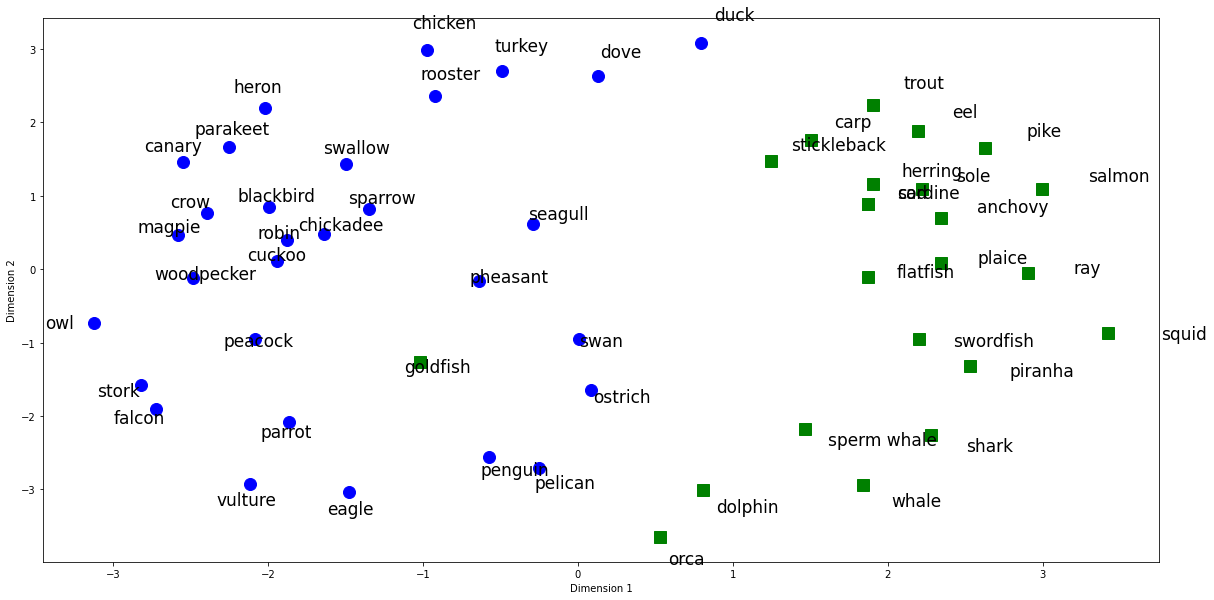

In [68]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2)
F_lowdim = embedding.fit_transform(F)

birdinds = np.where(labels==0)
fishinds = np.where(labels==1)

fig = plt.figure(figsize=(20, 10))
plt.plot(F_lowdim[birdinds,0],F_lowdim[birdinds,1],'bo',markersize=12)
plt.plot(F_lowdim[fishinds,0],F_lowdim[fishinds,1],'gs',markersize=12)

for i in range(0,len(F)):
    plt.text(F_lowdim[i,0]*1.1,F_lowdim[i,1]*1.1,names[i],fontsize=17)
    
plt.xlabel('Dimension 1')    
plt.ylabel('Dimension 2')    

# plt.show()

### Tasks 1-3 [10 pts] 
**Task 1**: Evaluate each model by standard leave-one-animal-out cross validation. **[2 pts]**

**Task 2**: Implement two models of categorization: a prototype model **[2pts]** and an exemplar model **[2pts]**.

**Task 3**: Report predictive accuracy of each model in percentage (i.e. % correct predictions out of 53 animals). **[1 pt]**

**Task 4**: Perform an error analysis on the two models (i.e. report which exemplars each model failed on), then compare and discuss why the errors look the way they do. **[3 pts]**


**Hint:** Consider using the following wrapper code for performing the leave-one-out (LOO) cross validation.

You may also want to refer to description and example code here: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

In [13]:
##### Leave-one-animal-out Cross Validation #####

loo = LeaveOneOut()
loo.get_n_splits(F) # 53 splitting iterations in the cross-validator

# 1) Get training and testing data points
for train_index, test_index in loo.split(F):
    print("TRAIN INDEX:", train_index)
    print("TEST INDEX:", test_index)
    F_train, F_test = F[train_index], F[test_index]
    print("TRAINING DATA:", F_train)
    print("TESTING DATA:", F_test)
    print("  ") # space holder so the output looks more organized 
    

TRAIN INDEX: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]
TEST INDEX: [0]
TRAINING DATA: [[1 0 0 ... 0 1 0]
 [0 1 1 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]]
TESTING DATA: [[0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0
  0 1 0 1 0 0 0 0]]
  
TRAIN INDEX: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]
TEST INDEX: [1]
TRAINING DATA: [[0 0 1 ... 0 0 0]
 [0 1 1 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]]
TESTING DATA: [[1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1
  1 1 1 0 0 0 1 0]]
  
TRAIN INDEX: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 3

### Prototype Model

In the following code chunk we will implement the prototype model and evaluate it by leave-one-out cross validation. 

**Idea Behind Prototype Model Implementation**

First, via multi-dimensional scaling, we lower the dimension of both the training data and the testing data to 2. Next, we calculate the mean of the birds and the fish in both. In this step, we calculate the mean of all x (dimension1) and y (dimension 2) values for the fish and the birds. Then, we compare the distance between the probe animal (F_test) with the bird means and the fish means respectively. Based on the calculated distances, we will categorize the probe animal as bird(0) or fish(1), and record this as variable `decision`. Now, on the verification step: we see what this probe animal really is by looking at `lables`. If the prediction is correct, then we will increase `prototype_accuracy_count` by 1. If the prediction is not correct, then we will record the probe animal name in the `prototype_animals_predicted_incorrectly` array. 

This code chunk would involve:

**Task 1** : evaluate prototype model by leave-one-out cross validation

**Task 2** : implementation of the prototype model

**Task 3** : report predictive accuracy of the prototype model


In [35]:

## functions that we will use later

def lowdim(F, train_index, int_test_index):
    embedding = MDS(n_components=2)
    F_lowdim = embedding.fit_transform(F)
    TRAINING_lowdim = F_lowdim[train_index]
    TEST_lowdim = F_lowdim[int_test_index]
    return (TRAINING_lowdim, TEST_lowdim)

def getm1m2(TRAINING_lowdim, train_index):
    birdinds = np.where(labels[train_index]==0)
    fishinds = np.where(labels[train_index]==1)
    bird_mean = np.array([np.mean(TRAINING_lowdim[birdinds,0]), np.mean(TRAINING_lowdim[birdinds,1])])
    fish_mean = np.array([np.mean(TRAINING_lowdim[fishinds,0]), np.mean(TRAINING_lowdim[fishinds,1])])
    TEST_lowdim = F_lowdim[0]
    return (bird_mean, fish_mean) 

def distance(TEST_lowdim, bird_mean, fish_mean):
    distance_to_bird_mean = spatial.distance.euclidean(TEST_lowdim, bird_mean)
    distance_to_fish_mean = spatial.distance.euclidean(TEST_lowdim, fish_mean)
    return(distance_to_bird_mean, distance_to_fish_mean)

def categorize_based_on_distance(distance_to_bird_mean, distance_to_fish_mean):
    if (distance_to_bird_mean == distance_to_fish_mean):
        # randomly categorize
        return mp.random.choice(2,1)[0]
    elif(distance_to_bird_mean < distance_to_fish_mean):
        return 0 # it's a bird!
    else:
        return 1 # it's a fish! 


prototype_accuracy_count = 0
prototype_animals_predicted_incorrectly = []

## Implement and predict with prototype model 
loo = LeaveOneOut()
loo.get_n_splits(F)
for train_index, test_index in loo.split(F):
    F = F
    # get training and test data, labels
    F_train, F_test=F[train_index], F[test_index]
    LABELS_train, LABELS_test = labels[train_index], labels[test_index][0]
    int_test_index = test_index[0]
    
    # lower dimention for both training and testing data
    (TRAINING_lowdim, TEST_lowdim) = lowdim(F, train_index, int_test_index)
    
    # get m1 and m2
    (bird_mean, fish_mean) = getm1m2(TRAINING_lowdim, train_index)
    
    # calculate the distance from TESTING_DATA and the two means
    (distance_to_bird_mean, distance_to_fish_mean) = distance(TEST_lowdim, bird_mean, fish_mean)
    
    # decide TESTING_DATA is a bird (0) or fish (1)
    decision = categorize_based_on_distance(distance_to_bird_mean, distance_to_fish_mean)
    
    # record accuracy 
    ground_truth = labels[int_test_index] 
    if (ground_truth == decision):
        accurate = 1
    else:
        accurate = 0
    prototype_accuracy_count += accurate # we add 1 to the accuracy count
    if (accurate == 0):
        prototype_animals_predicted_incorrectly.append(names[int_test_index]) 
        # we record the animal that we got wrong


prototype_predictive_accuracy_percent = round(prototype_accuracy_count / 53 * 100, 2)
        
print("How many prototype got right: ", prototype_accuracy_count)
print("The rate of accuracy: ", prototype_predictive_accuracy_percent, "%")
print("How many animimals got predicted wrong: ", len(prototype_animals_predicted_incorrectly))
print("Which animals got predicted wrong: ", prototype_animals_predicted_incorrectly)

How many prototype got right:  50
The rate of accuracy:  94.34 %
How many animimals got predicted wrong:  3
Which animals got predicted wrong:  ['dove', 'duck', 'goldfish']


### Exemplar Model

In the following code chunk we will implement the exemplar model and evaluate it by leave-one-out cross validation. 

**Idea Behind Exemplar Model Implementation**

First, via multi-dimensional scaling, we lower the dimension of both the training data and the testing data to 2. Then by using the `attraction` function, we calculate the attraction between the probe animal with birds and fish respectively. In the `attraction` function, we first calculate the distance between each animal with the probe animal, then we calculate the similarity value by `exp(-distance)`. Notice that the longer the distance, we have less similarity between the animal and the probe animal. Finally, we sum up the similarity values and divided the sum with the size of the category. The model then define `decision` as the prediction of the probe animal, and the prediction is made based on the attractions. Simlar to the prototype model, if the `decision` is identical to the `ground_truth`, then we increase `exemplar_accuracy_count` by 1. If the prediction is incorrect, then we will record the probe animal in the `exemplar_animals_predicted_incorrectly` array. 

This code chunk would involve:

**Task 1** : evaluate exemplar model by leave-one-out cross validation

**Task 2** : implementation of the exemplar model

**Task 3** : report predictive accuracy of the exemplar model

In [50]:
## functions that we will use later

def lowdim(F, train_index, int_test_index):
    embedding = MDS(n_components=2)
    F_lowdim = embedding.fit_transform(F)
    TRAINING_lowdim = F_lowdim[train_index]
    TEST_lowdim = F_lowdim[int_test_index]
    return (TRAINING_lowdim, TEST_lowdim, F_lowdim)
    
def attraction(F_lowdim, train_index, TRAINING_lowdim,TEST_lowdim):
    # calculate how many birds or fish we have in the training data
    birdinds = np.where(labels[train_index]==0)
    fishinds = np.where(labels[train_index]==1)
    number_of_birds = len(TRAINING_lowdim[birdinds])
    number_of_fish = len(TRAINING_lowdim[fishinds])
    
    sum_similarity_birds = 0
    sum_similairty_fish = 0
    for animal in train_index:
        distance = spatial.distance.euclidean(F_lowdim[animal], TEST_lowdim )
        similarity = np.exp(-distance) # longer the distance, less similarity
        if(labels[animal] == 0):
            sum_similarity_birds += similarity
        else:
            sum_similairty_fish += similarity
    attraction_bird = sum_similarity_birds / number_of_birds
    attraction_fish = sum_similairty_fish / number_of_fish
    return (attraction_bird, attraction_fish)


## Implement and predict with exemplar model

exemplar_accuracy_count = 0
exemplar_animals_predicted_incorrectly = []

## Implement and predict with exemplar model 
loo = LeaveOneOut()
loo.get_n_splits(F)
for train_index, test_index in loo.split(F):
    F = F
    # get training and test data, labels
    F_train, F_test=F[train_index], F[test_index]
    LABELS_train, LABELS_test = labels[train_index], labels[test_index][0]
    int_test_index = test_index[0]
    
    # lower dimension for both training and testing data
    (TRAINING_lowdim, TEST_lowdim, F_lowdim) = lowdim(F, train_index, int_test_index)
    
    # attraction from probe to bird, and probe to fish
    (attraction_bird, attraction_fish) = attraction(F_lowdim, train_index, TRAINING_lowdim,TEST_lowdim)
    

    # decide TESTING_DATA is a bird (0) or fish (1)
    if (attraction_bird == attraction_fish):
        # randomly categorize
        decision =  mp.random.choice(2,1)[0]
    elif(attraction_bird > attraction_fish):
        decision = 0 # it's a bird
    else:
        decision = 1 # it's a fish
    
    # record accuracy 
    ground_truth = labels[int_test_index] 
    if (ground_truth == decision):
        accurate = 1
    else:
        accurate = 0
    exemplar_accuracy_count += accurate # we add 1 to the accuracy count
    if (accurate == 0):
        exemplar_animals_predicted_incorrectly.append(names[int_test_index]) 
        # we record the animal that we got wrong


exemplar_predictive_accuracy_percent = round(exemplar_accuracy_count / 53 * 100, 2)

print("How many exemplar got right: ", exemplar_accuracy_count)
print("The rate of accuracy: ", exemplar_predictive_accuracy_percent, "%")
print("How many animimals got predicted wrong: ", len(exemplar_animals_predicted_incorrectly))
print("Which animals got predicted wrong: ", exemplar_animals_predicted_incorrectly)


How many exemplar got right:  51
The rate of accuracy:  96.23 %
How many animimals got predicted wrong:  2
Which animals got predicted wrong:  ['duck', 'goldfish']


### Task 4
Perform an error analysis on the two models (i.e. report which exemplars each model failed on), then compare and discuss why the errors look the way they do. 

**Results from the Prototype model**

The rate of accuracy of the prototype model is 94.34%. The prototype model failed on correctly categorizing `dove`, `duck`, and `goldfish`. The reason why the prototype model made these errors is that these animals are far away from the means. From the 2D visualization, we can see that goldfish is close to the center of the birds cluster than to the cetner of the fish cluster. The 2D visualization draws parallel with the protorype model since we have implemented the model in such a way that the dimensions are all lowered to 2. 

**Results from the Exemplar model**

The rate of accuracy of the exemplar model is 96.23%. The exemplar model failed on correctly categorizing `duck`, and `goldfish`. Again, we will use the 2D visualization to explain why the model made such mistake. `duck` is located near the cluster of fish. Therefore, the average distance between the duck and all the fish is shorter than the average distance between duck and all the birds. Hence, the exemplar model would categorize `duck` as a fish. 

**Compare results of the Exemplar model and the Protorype model**

It is interesting to see that only `dove` is categorized incorrectly by the Prototype model but the Exemplar model categorized it correctly. The Exemplar model considers influence from each instance. In other words, the Exemplar model captures neighbourhood density. From the visualization, we can see that dove is close to other birds such as turkey, ostrich, and pheasant. In the Exemplar model, these neighbourhood birds will place a heavy influence on the dove. Therefore, the Exmeplar model accurately categorized dove as birds. On the other hand, the Prototype model predicts based on averages (means). From the 2D visualization, we can see that dove is on the very edge of the birds cluster, but it is located near the fish cluster. Hence, the distance between dove and the center of the birds cluster is longer than the distance between dove and the center of the fish cluster. Based on the Prototype model, dove would be incorrectly categorized as a fish. 


Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. 